<a href="https://colab.research.google.com/github/pVj15/Student-Performance-Prediction/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# These are usually pre-installed, but you can install if needed
!pip install pandas numpy scikit-learn matplotlib seaborn



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib



In [ ]:
# Sample dataset with 20 students
data = {
    'study_hours': [5, 1, 4, 3, 2, 6, 7, 8, 1, 2, 5, 3, 6, 7, 2, 4, 3, 1, 5, 6],
    'attendance': [90, 60, 85, 75, 50, 95, 97, 88, 40, 55, 85, 70, 95, 100, 45, 80, 72, 30, 90, 98],
    'prev_exam_score': [78, 45, 72, 65, 40, 88, 90, 85, 35, 50, 76, 68, 89, 93, 42, 74, 60, 30, 80, 92],
    'participation': [4, 1, 3, 2, 1, 5, 5, 4, 1, 2, 4, 3, 5, 5, 2, 3, 2, 1, 4, 5],
    'sleep_hours': [7, 5, 6, 6, 4, 8, 7, 7, 4, 5, 7, 6, 8, 7, 5, 6, 6, 4, 7, 8],
    'internet_usage': [2, 6, 3, 5, 7, 2, 1, 1, 6, 5, 2, 3, 1, 1, 5, 3, 4, 6, 2, 1],
    'result': ['Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail',
               'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass']
}

df = pd.DataFrame(data)
df.head()


,study_hours,attendance,prev_exam_score,participation,sleep_hours,internet_usage,result
0,5,90,78,4,7,2,Pass
1,1,60,45,1,5,6,Fail
2,4,85,72,3,6,3,Pass
3,3,75,65,2,6,5,Pass
4,2,50,40,1,4,7,Fail


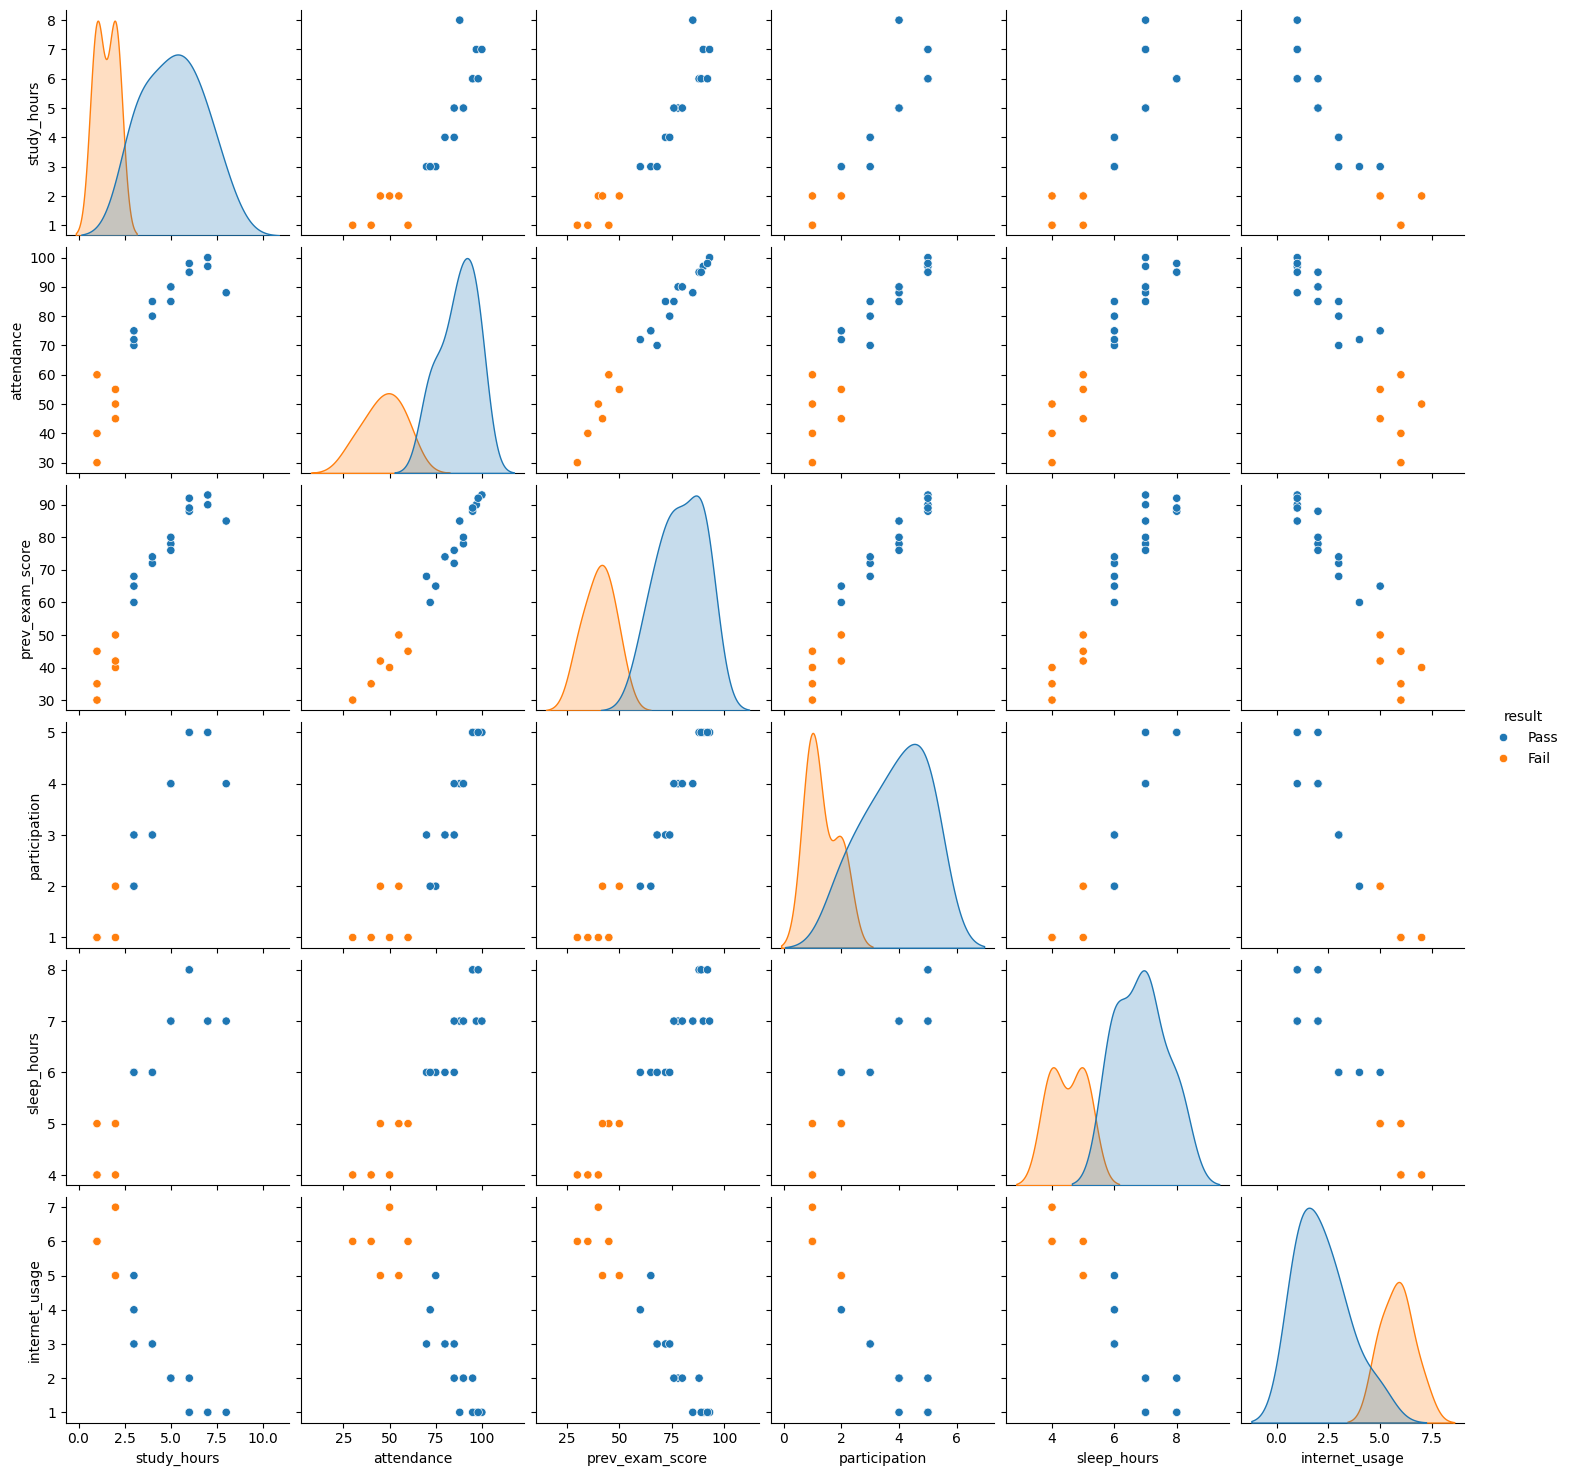

In [ ]:
sns.pairplot(df, hue="result")
plt.show()


In [ ]:
# Make sure result is clean (in case of extra spaces, etc.)
df['result'] = df['result'].str.strip().str.capitalize()

# Convert result: Pass → 1, Fail → 0
df['result'] = df['result'].map({'Pass': 1, 'Fail': 0})

# Drop rows where mapping failed (just in case)
df = df.dropna()

# Separate input (X) and output (y)
X = df.drop('result', axis=1)
y = df['result']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")


✅ Model Accuracy: 100.0 %


In [ ]:
# Input format: [study_hours, attendance, prev_exam_score, participation, sleep_hours, internet_usage]
new_student = [[4, 85, 70, 3, 7, 2]]

prediction = model.predict(new_student)
print("Prediction for new student:", "🎉 Pass" if prediction[0] == 1 else "❌ Fail")


Prediction for new student: 🎉 Pass


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
